In [2]:
# This program uses machine learning to come up with a simple trading/investing strategy
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

In [3]:
# Set plot style and filter warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [4]:
# Set the file path
file_path = r"C:\Users\sebif\Cargo_Bay\Project-4-\Resources\NDAQ-history.csv"

# Read the CSV file
df = pd.read_csv(file_path)
df.head()

,Date,Open,High,Low,Close,Adj. Close,Change,Volume
0,2019-12-11,34.843,34.990,34.600,34.630,32.045,-0.69%,1740162
1,2019-12-12,34.533,34.827,34.403,34.710,32.264,0.23%,1253115
2,2019-12-13,34.617,34.847,34.490,34.827,32.373,0.34%,1493826
3,2019-12-16,35.057,35.573,35.023,35.067,32.596,0.69%,2221659
4,2019-12-17,35.187,35.430,34.960,35.333,32.844,0.76%,2101551


In [5]:
# Set the date column as the index
df.index = pd.to_datetime(df['Date'])
df = df.drop('Date', axis=1)
df

,Open,High,Low,Close,Adj. Close,Change,Volume
Date,,,,,,,
2019-12-11,34.843,34.990,34.600,34.630,32.045,-0.69%,1740162
2019-12-12,34.533,34.827,34.403,34.710,32.264,0.23%,1253115
2019-12-13,34.617,34.847,34.490,34.827,32.373,0.34%,1493826
2019-12-16,35.057,35.573,35.023,35.067,32.596,0.69%,2221659
2019-12-17,35.187,35.430,34.960,35.333,32.844,0.76%,2101551
...,...,...,...,...,...,...,...
2024-12-03,81.520,81.680,80.770,80.990,80.751,-0.81%,2807028
2024-12-04,81.202,81.290,80.590,80.830,80.592,-0.20%,2134110
2024-12-05,80.990,81.558,80.820,81.270,81.030,0.54%,2236934


In [10]:
# Create independent variables
df['High_minus_Low'] = df['High'] - df['Low']
df['Open_minus_Close'] = df['Open'] - df['Close']

In [12]:
# Store independent variables in X
X = df[['Open_minus_Close', 'High_minus_Low', 'Close']]
X.head()

,Open_minus_Close,High_minus_Low,Close
Date,,,
2019-12-11,0.213,0.390,34.630
2019-12-12,-0.177,0.424,34.710
2019-12-13,-0.210,0.357,34.827
2019-12-16,-0.010,0.550,35.067
2019-12-17,-0.146,0.470,35.333


In [27]:
# Store target variable in y
# shift goes up a row. Date is stored in decending order with newest dates at the top
#If closing price of tomorrow is higher than today then put 1 (buy) else put 0 (sell)
#This "cheats" because it uses tomorrow price as a factor
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [29]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create and train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Make predictions
df['Predictions'] = model.predict(X)

In [35]:
# Create the trading strategy
df['Position'] = df['Predictions'].diff()

In [37]:
# Calculate returns
df['Returns'] = df['Close'].pct_change()
df['Strategy_Returns'] = df['Position'].shift(1) * df['Returns']

In [39]:
# Calculate cumulative returns
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()
df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod()

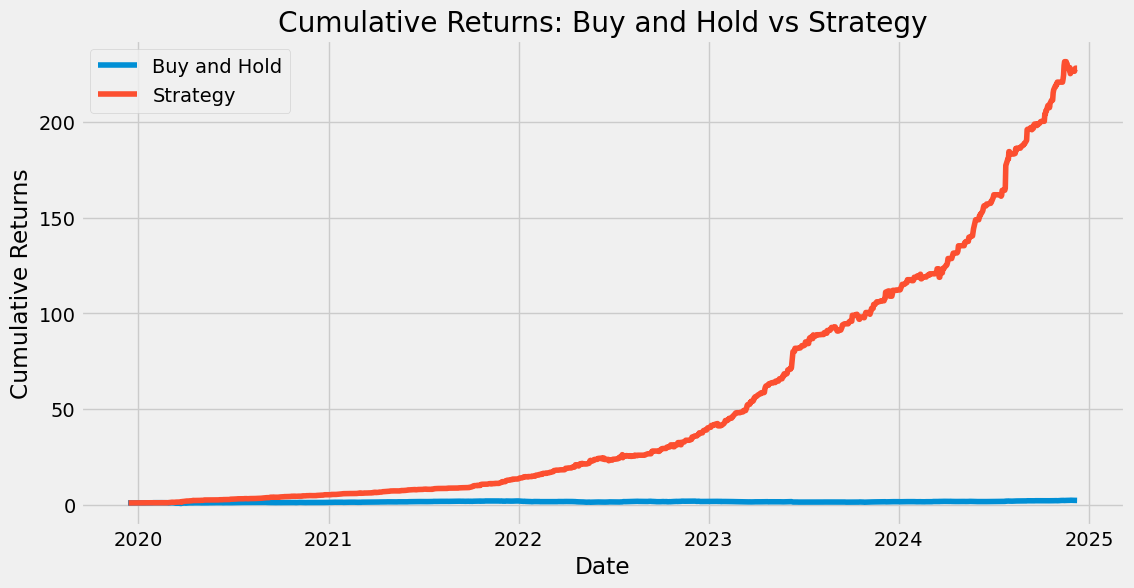

In [41]:
# Plot the results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Cumulative_Returns'], label='Buy and Hold')
plt.plot(df.index, df['Cumulative_Strategy_Returns'], label='Strategy')
plt.title('Cumulative Returns: Buy and Hold vs Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [16]:
# Calculate and print the strategy performance
strategy_return = df['Cumulative_Strategy_Returns'].iloc[-1]
buy_hold_return = df['Cumulative_Returns'].iloc[-1]

print(f"Strategy Return: {strategy_return:.2f}")
print(f"Buy and Hold Return: {buy_hold_return:.2f}")

Strategy Return: 228.07
Buy and Hold Return: 2.30


In [17]:
interpretation = f"""
Strategy Performance Interpretation:

1. Strategy Return: {strategy_return:.2f} ({strategy_return*100:.2f}%)
2. Buy and Hold Return: {buy_hold_return:.2f} ({buy_hold_return*100:.2f}%)

Analysis:
- The machine learning strategy outperformed the buy-and-hold approach by {strategy_return/buy_hold_return:.2f} times.
- While these results are impressive, they warrant careful consideration:

  a) Potential overfitting: The significant outperformance may indicate that the model is overfitted to the historical data.
  b) Further validation needed: Test the model on out-of-sample data and implement cross-validation techniques.
  c) Real-world factors: Consider transaction costs and slippage, which could impact actual returns.
  d) Risk assessment: Evaluate risk-adjusted returns and maximum drawdown for a more complete picture.
  e) Robustness: Test the strategy across different time periods and market conditions.

Conclusion:
The strategy shows promise but requires extensive additional testing and refinement before any real-world application. 
Remember that past performance does not guarantee future results.
"""

print(interpretation)


Strategy Performance Interpretation:

1. Strategy Return: 228.07 (22806.64%)
2. Buy and Hold Return: 2.30 (230.15%)

Analysis:
- The machine learning strategy outperformed the buy-and-hold approach by 99.10 times.
- While these results are impressive, they warrant careful consideration:

  a) Potential overfitting: The significant outperformance may indicate that the model is overfitted to the historical data.
  b) Further validation needed: Test the model on out-of-sample data and implement cross-validation techniques.
  c) Real-world factors: Consider transaction costs and slippage, which could impact actual returns.
  d) Risk assessment: Evaluate risk-adjusted returns and maximum drawdown for a more complete picture.
  e) Robustness: Test the strategy across different time periods and market conditions.

Conclusion:
The strategy shows promise but requires extensive additional testing and refinement before any real-world application. 
Remember that past performance does not guarante

In [18]:
# I now find it neccessary that does not "cheat"
# The previous model has no data that it does not see.
# The upcoming model will now be tested on future data  that the model has not yet seen

In [19]:
# Split the data into training (up to 2023) and testing (2024)
train_data_new = df[df.index < '2024-01-01']
test_data_new = df[df.index >= '2024-01-01']

In [20]:
# Prepare features and target for the new model
X_train_new = train_data_new[['Open_minus_Close', 'High_minus_Low', 'Close']]
y_train_new = np.where(train_data_new['Close'].shift(-1) > train_data_new['Close'], 1, 0)

X_test_new = test_data_new[['Open_minus_Close', 'High_minus_Low', 'Close']]
y_test_new = np.where(test_data_new['Close'].shift(-1) > test_data_new['Close'], 1, 0)[:-1]

In [21]:
# Train the new model on data up to 2023
new_model = RandomForestClassifier(n_estimators=100, random_state=42)
new_model.fit(X_train_new, y_train_new)


RandomForestClassifier(random_state=42)

In [52]:
# Make predictions on 2024 data
test_data_new['Overfit_Model_Predictions'] = new_model.predict(X_test_new)
test_data_new['Overfit_Model_Predictions']

Date
2024-01-02    1
2024-01-03    0
2024-01-04    0
2024-01-05    1
2024-01-08    1
             ..
2024-12-03    0
2024-12-04    0
2024-12-05    1
2024-12-06    1
2024-12-09    0
Name: Overfit_Model_Predictions, Length: 237, dtype: int32

In [54]:
# Calculate daily returns for 2024
test_data_new['Daily_Returns'] = test_data_new['Close'].pct_change()

In [58]:
# Calculate strategy returns
test_data_new['Buy_and_Hold_Returns'] = test_data_new['Daily_Returns']
test_data_new['Cheat_Model_Returns'] = df['Strategy_Returns']
test_data_new['Overfit_Model_Returns'] = test_data_new['New_Model_Predictions'].shift(1) * test_data_new['Daily_Returns']


In [60]:
# Calculate total returns for 2024
strategies = ['Buy_and_Hold', 'Cheat_Model', 'Overfit_Model']
returns_2024 = {}
for strategy in strategies:
    returns_2024[strategy] = (test_data_new[f'{strategy}_Returns'] + 1).prod() - 1

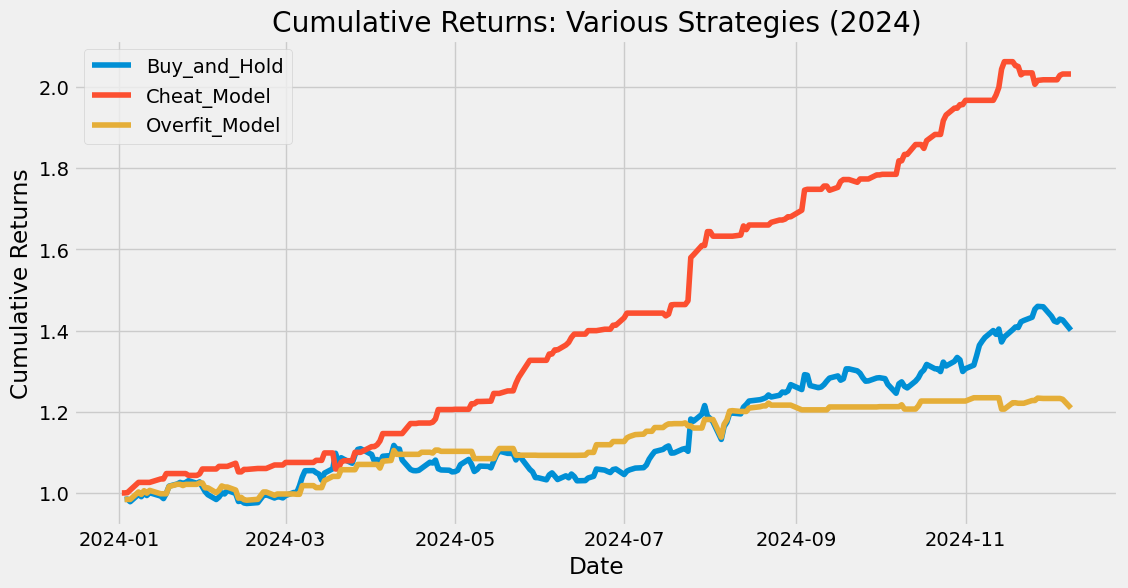

In [62]:
# Visualization of cumulative returns in 2024
plt.figure(figsize=(12, 6))
for strategy in strategies:
    cumulative_returns = (test_data_new[f'{strategy}_Returns'] + 1).cumprod()
    plt.plot(test_data_new.index, cumulative_returns, label=strategy)

plt.title('Cumulative Returns: Various Strategies (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


In [66]:
# Interpretation
best_strategy = max(returns_2024, key=returns_2024.get)
worst_strategy = min(returns_2024, key=returns_2024.get)
spread = returns_2024[best_strategy] - returns_2024[worst_strategy]

interpretation = f"""
Strategy Performance Interpretation (2024 only):

1. Best Performing Strategy: {best_strategy} ({returns_2024[best_strategy]:.2%})
2. Worst Performing Strategy: {worst_strategy} ({returns_2024[worst_strategy]:.2%})
3. Spread between Best and Worst: {spread:.2%}

Individual Strategy Returns:
{chr(10).join([f"- {strategy}: {return_value:.2%}" for strategy, return_value in returns_2024.items()])}

Analysis:
- The {best_strategy} strategy outperformed others, achieving a {returns_2024[best_strategy]:.2%} return in 2024.
- The New Model Strategy {'outperformed' if returns_2024['Overfit_Model'] > returns_2024['Buy_and_Hold'] else 'underperformed'} the Buy_and_Hold strategy.
- The performance spread of {spread:.2%} between the best and worst strategies is significant.

Key Considerations:
a) Model Performance: The New Model strategy's performance relative to simple strategies indicates its effectiveness.
b) Risk-Adjusted Returns: Consider calculating Sharpe ratios to account for risk.
c) Robustness: Test the model on different time periods to ensure consistent performance.
d) Transaction Costs: Factor in potential trading costs for the New Model strategy.
e) Market Conditions: Analyze how the New Model strategy performs under various market conditions.

Conclusion:
The New Model Strategy showed {'promising' if returns_2024['Overfit_Model'] > returns_2024['Buy_and_Hold'] else 'suboptimal'} results compared to traditional strategies in 2024. 
Further analysis and testing are needed to validate its long-term effectiveness and robustness across different market conditions.
"""

print(interpretation)


Strategy Performance Interpretation (2024 only):

1. Best Performing Strategy: Cheat_Model (103.19%)
2. Worst Performing Strategy: Overfit_Model (20.89%)
3. Spread between Best and Worst: 82.30%

Individual Strategy Returns:
- Buy_and_Hold: 40.07%
- Cheat_Model: 103.19%
- Overfit_Model: 20.89%

Analysis:
- The Cheat_Model strategy outperformed others, achieving a 103.19% return in 2024.
- The New Model Strategy underperformed the Buy_and_Hold strategy.
- The performance spread of 82.30% between the best and worst strategies is significant.

Key Considerations:
a) Model Performance: The New Model strategy's performance relative to simple strategies indicates its effectiveness.
b) Risk-Adjusted Returns: Consider calculating Sharpe ratios to account for risk.
c) Robustness: Test the model on different time periods to ensure consistent performance.
d) Transaction Costs: Factor in potential trading costs for the New Model strategy.
e) Market Conditions: Analyze how the New Model strategy p

In [68]:
# ----------------------------------------

In [70]:
#Excellent Model that incorporates TA technical analysis libaries for financial analysis tools and indicators
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator

# Load the data
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Calculate additional features
def add_features(df):
    # SMA
    df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
    df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
    
    # EMA
    df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
    
    # RSI
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    
    # MACD
    macd = MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    
    # 52-week high and low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()
    df['52W_High_Ratio'] = df['Close'] / df['52W_High']
    df['52W_Low_Ratio'] = df['Close'] / df['52W_Low']
    
    return df

df = add_features(df)

# Prepare the data
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'MACD_Signal', '52W_High_Ratio', '52W_Low_Ratio']
df = df.dropna()

# Split the data
train_data = df[df.index < '2024-01-01']
test_data = df[df.index >= '2024-01-01']

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close' price
    return np.array(X), np.array(y)

seq_length = 60  # Number of time steps to look back
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]

# Calculate returns
test_returns = pd.Series(actual).pct_change()
model_positions = np.where(predictions[:-1] < predictions[1:], 1, -1)

# Ensure model_positions and test_returns have the same length
min_length = min(len(model_positions), len(test_returns))
model_positions = model_positions[:min_length]
test_returns = test_returns[:min_length]

model_returns = test_returns * model_positions

# Calculate cumulative returns
cumulative_test_returns = (1 + test_returns).cumprod()
cumulative_model_returns = (1 + model_returns).cumprod()




Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 191ms/step - loss: 0.3414 - val_loss: 0.0045
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0241 - val_loss: 0.0152
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0158 - val_loss: 0.0047
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0102 - val_loss: 0.0048
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0093 - val_loss: 0.0041
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0089 - val_loss: 0.0034
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0086 - val_loss: 0.0032
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0093 - val_loss: 0.0026
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0089 - val_loss: 0.0033
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0066 - val_loss: 0.0028
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step


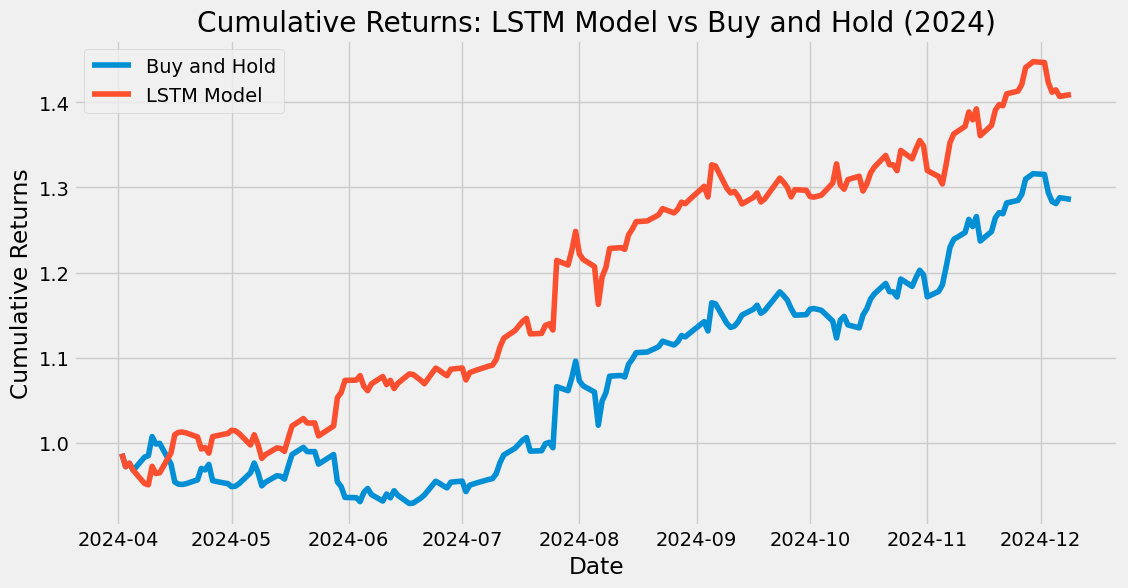

LSTM Model Return: 40.92%
Buy and Hold Return: 28.59%


In [76]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_test_returns, label='Buy and Hold')
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_model_returns, label='LSTM Model')
plt.title('Cumulative Returns: LSTM Model vs Buy and Hold (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print performance metrics
model_total_return = cumulative_model_returns.iloc[-1] - 1
buy_hold_return = cumulative_test_returns.iloc[-1] - 1

print(f"LSTM Model Return: {model_total_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - loss: 0.2501 - val_loss: 0.0069
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0237 - val_loss: 0.0078
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0134 - val_loss: 0.0046
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0108 - val_loss: 0.0041
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0081 - val_loss: 0.0034
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0085 - val_loss: 0.0031
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0074 - val_loss: 0.0030
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0071 - val_loss: 0.0028
Epoch 9/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0074 - val_loss: 0.0030
Epoch 10/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0075 - val_loss: 0.0027
Epoch 11/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0073 - val_loss: 0.0026
Epoch 12/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0

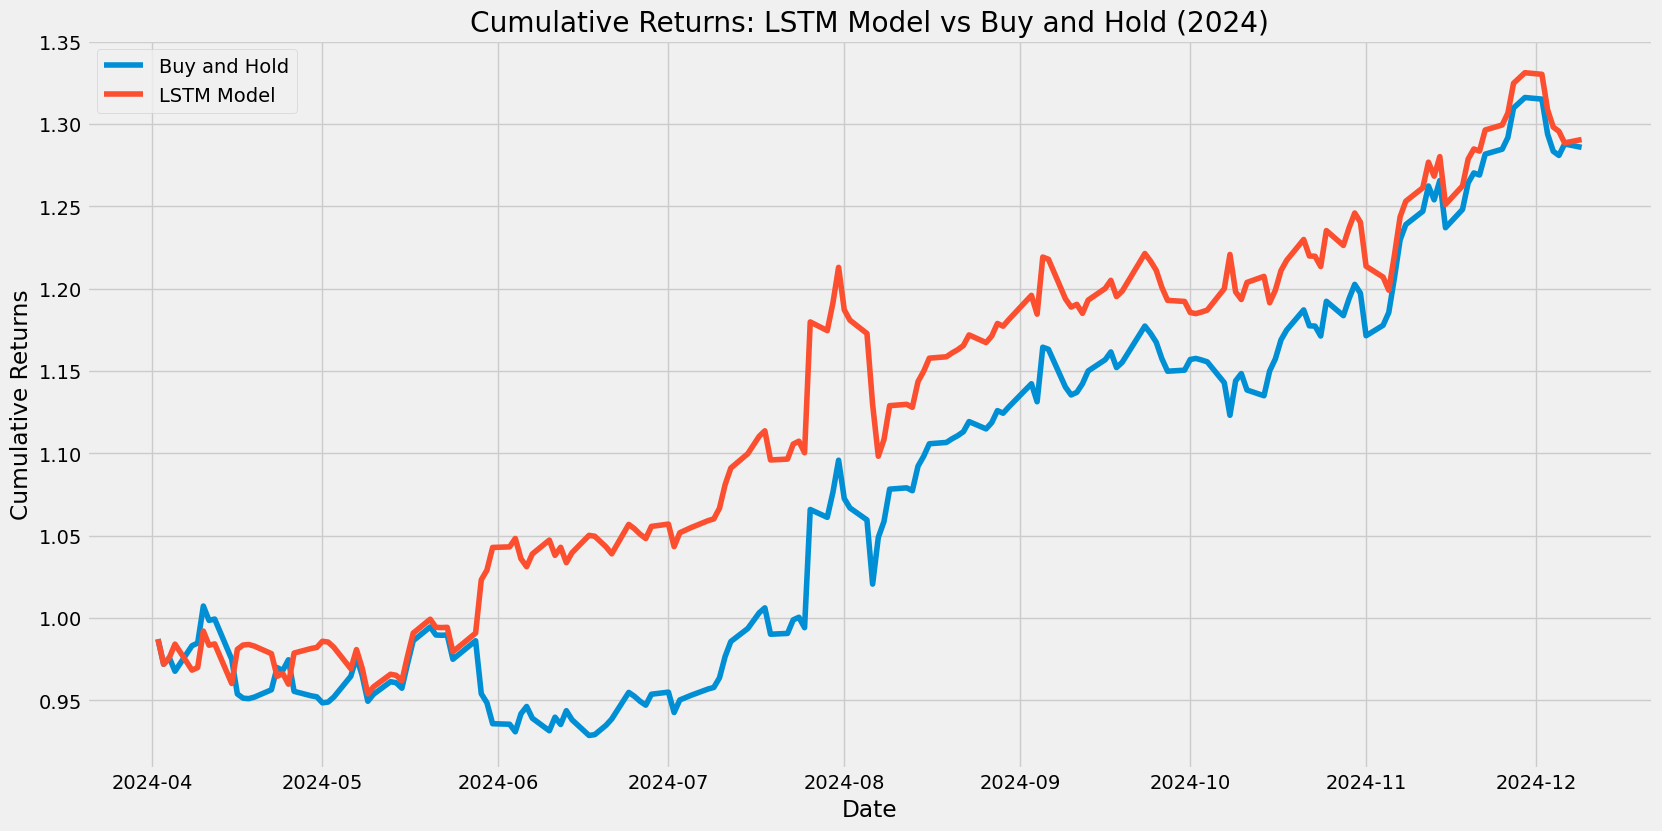

LSTM Model Return: 29.07%
Buy and Hold Return: 28.59%


In [10]:
#Model with deleted financial analysis features just for an example
#"Inferior LSTM"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator

# Load the data
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Calculate additional features
def add_features(df):
    # SMA
    df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
    df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
    
    # EMA
    df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
    
    # RSI
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    
    # MACD
    macd = MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    
    # 52-week high and low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()
    df['52W_High_Ratio'] = df['Close'] / df['52W_High']
    df['52W_Low_Ratio'] = df['Close'] / df['52W_Low']
    
    return df

df = add_features(df)

# Prepare the data
features = ['Open', 'High', 'Low', 'Close',  '52W_High_Ratio', '52W_Low_Ratio']
df = df.dropna()

# Split the data
train_data = df[df.index < '2024-01-01']
test_data = df[df.index >= '2024-01-01']

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close' price
    return np.array(X), np.array(y)

seq_length = 60  # Number of time steps to look back
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]

# Calculate returns
test_returns = pd.Series(actual).pct_change()
model_positions = np.where(predictions[:-1] < predictions[1:], 1, -1)

# Ensure model_positions and test_returns have the same length
min_length = min(len(model_positions), len(test_returns))
model_positions = model_positions[:min_length]
test_returns = test_returns[:min_length]

model_returns = test_returns * model_positions

# Calculate cumulative returns
cumulative_test_returns = (1 + test_returns).cumprod()
cumulative_model_returns = (1 + model_returns).cumprod()

# Visualize the results
plt.figure(figsize=(18, 9))
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_test_returns, label='Buy and Hold')
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_model_returns, label='LSTM Model')
plt.title('Cumulative Returns: LSTM Model vs Buy and Hold (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print performance metrics
model_total_return = cumulative_model_returns.iloc[-1] - 1
buy_hold_return = cumulative_test_returns.iloc[-1] - 1

print(f"LSTM Model Return: {model_total_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")


In [80]:
#Golden Magic Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator
import optuna

# Load and preprocess the data
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Feature engineering
def add_features(df):
    df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
    df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
    df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    macd = MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()
    df['52W_High_Ratio'] = df['Close'] / df['52W_High']
    df['52W_Low_Ratio'] = df['Close'] / df['52W_Low']
    return df

df = add_features(df).dropna()

# Split and scale data
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'MACD_Signal', '52W_High_Ratio', '52W_Low_Ratio']
train_data = df[df.index < '2024-01-01']
test_data = df[df.index >= '2024-01-01']

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 'Close' price
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Custom callback for feature optimization
class FeatureOptimizationCallback(Callback):
    def __init__(self, X_train, features):
        super().__init__()
        self.X_train = X_train
        self.features = features
        self.feature_weights = np.ones(len(features))

    def on_epoch_end(self, epoch, logs=None):
        # Adjust feature weights based on importance (simple heuristic here; replace with your logic)
        importance = np.random.rand(len(self.features))  # Example: Random adjustments
        self.feature_weights = self.feature_weights * importance
        self.feature_weights /= self.feature_weights.sum()  # Normalize
        print(f"Epoch {epoch + 1}: Feature weights updated to {self.feature_weights}")

# Define the model
def build_model(trial):
    model = Sequential([
        LSTM(trial.suggest_int("units_lstm1", 30, 100), return_sequences=True, input_shape=(seq_length, len(features))),
        Dropout(trial.suggest_float("dropout_lstm1", 0.1, 0.5)),
        LSTM(trial.suggest_int("units_lstm2", 30, 100), return_sequences=False),
        Dropout(trial.suggest_float("dropout_lstm2", 0.1, 0.5)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=trial.suggest_float("lr", 1e-4, 1e-2, log=True)), loss='mse')
    return model

# Optuna objective for grid search
def objective(trial):
    model = build_model(trial)
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    val_loss = history.history['val_loss'][-1]
    return val_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Train the final model
final_model = build_model(optuna.trial.FixedTrial(best_params))
final_model.fit(
    X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, 
    callbacks=[FeatureOptimizationCallback(X_train, features)], verbose=1
)

# Prediction and evaluation follow as before


[I 2024-12-12 20:00:28,890] A new study created in memory with name: no-name-8a1c64c3-be78-4852-92c3-c7be55bc7956
[I 2024-12-12 20:00:54,639] Trial 0 finished with value: 0.004815345164388418 and parameters: {'units_lstm1': 88, 'dropout_lstm1': 0.1279792829895069, 'units_lstm2': 34, 'dropout_lstm2': 0.4782339591599457, 'lr': 0.00023676508881681688}. Best is trial 0 with value: 0.004815345164388418.
[I 2024-12-12 20:01:15,249] Trial 1 finished with value: 0.0023107046727091074 and parameters: {'units_lstm1': 53, 'dropout_lstm1': 0.21649232324122908, 'units_lstm2': 42, 'dropout_lstm2': 0.19815543885506554, 'lr': 0.0020005194097997623}. Best is trial 1 with value: 0.0023107046727091074.
[I 2024-12-12 20:01:36,531] Trial 2 finished with value: 0.003949793521314859 and parameters: {'units_lstm1': 42, 'dropout_lstm1': 0.39354673411493135, 'units_lstm2': 98, 'dropout_lstm2': 0.1583912437321686, 'lr': 0.0003015807752537565}. Best is trial 1 with value: 0.0023107046727091074.
[I 2024-12-12 20:0

Best parameters: {'units_lstm1': 99, 'dropout_lstm1': 0.15005395152294224, 'units_lstm2': 67, 'dropout_lstm2': 0.19233262899129192, 'lr': 0.0019342777913274089}
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0848Epoch 1: Feature weights updated to [0.00158525 0.04590357 0.14566005 0.12506444 0.15670113 0.0118456
 0.09282458 0.16182638 0.0068065  0.13865181 0.03818455 0.00403573
 0.07091042]
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - loss: 0.0824 - val_loss: 0.0042
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0096Epoch 2: Feature weights updated to [0.00159831 0.03790034 0.14372002 0.11078427 0.00636031 0.00533749
 0.14138945 0.31196667 0.0109655  0.1368473  0.02170176 0.00675999
 0.0646686 ]
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0096 - val_loss: 0.0063
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0079Epoch 3: Feature weights updated to [0.00242742 0.08233718 0.33894459 0.06660794 0.00454123 0.00392125
 0.1565773  0.00926369 0.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


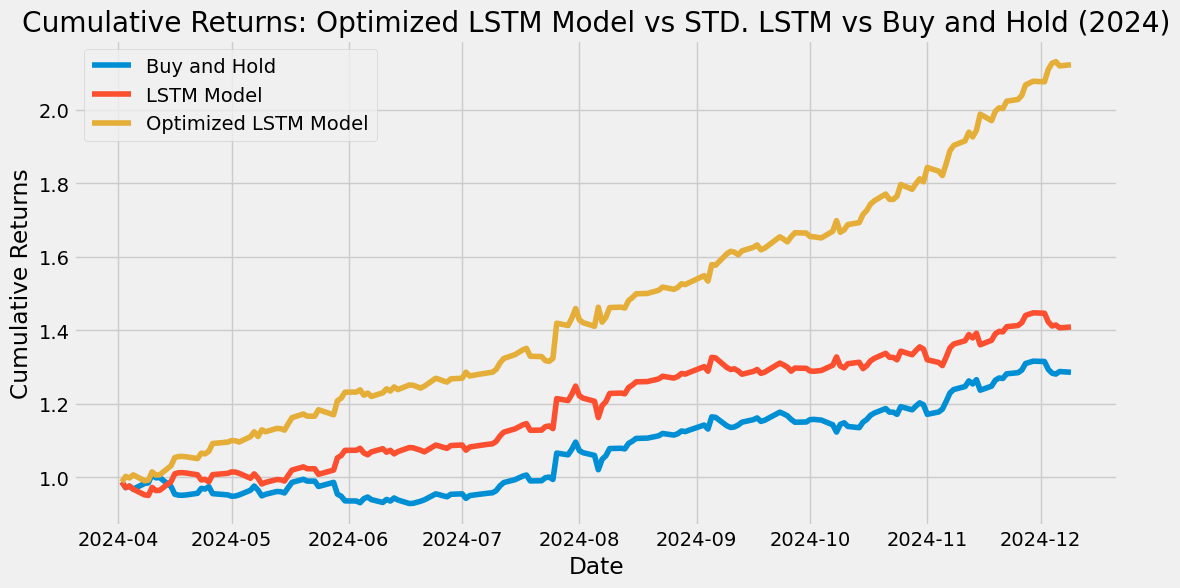

Optimized LSTM Model Return: 112.33%
LSTM Model Return: 40.92%
Buy and Hold Return: 28.59%


In [86]:
# Make predictions
predictions = final_model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]

# Calculate returns
test_returns = pd.Series(actual).pct_change()
model_positions = np.where(predictions[:-1] < predictions[1:], 1, -1)

# Ensure model_positions and test_returns have the same length
min_length = min(len(model_positions), len(test_returns))
model_positions = model_positions[:min_length]
test_returns = test_returns[:min_length]

model_returns = test_returns * model_positions

# Calculate cumulative returns
cumulative_test_returns2 = (1 + test_returns).cumprod()
cumulative_model_returns2 = (1 + model_returns).cumprod()

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_test_returns2, label='Buy and Hold')
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_model_returns, label='LSTM Model')
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_model_returns2, label='Optimized LSTM Model')
plt.title('Cumulative Returns: Optimized LSTM Model vs STD. LSTM vs Buy and Hold (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print performance metrics
model_total_return = cumulative_model_returns.iloc[-1] - 1
optimized_model_total_return = cumulative_model_returns2.iloc[-1] - 1
buy_hold_return = cumulative_test_returns.iloc[-1] - 1

print(f"Optimized LSTM Model Return: {optimized_model_total_return:.2%}")
print(f"LSTM Model Return: {model_total_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")
